In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#this will allow the plot to be inline in the browser
%matplotlib inline

### Exercise: Create the 4 node network of Lecture 1 and respond the following questions (use networkx documentation or Google the questions)

In [2]:
g = nx.Graph()  #Graph base class for undirected graphs. See also:DiGraph for directed graphs
g.add_edge('1','2',weight=1.0) #Nodes can be arbitrary (hashable) Python objects with optional key/value attributes.
g.add_edge('2','3',weight=1.0) #Edges are represented as links between nodes with optional key/value attributes.                                
g.add_edge('2','4',weight=1.0) #We create a network by adding 11 edges to the graph (g) of 4 nodes. 
g.add_edge('4','3',weight=1.0)

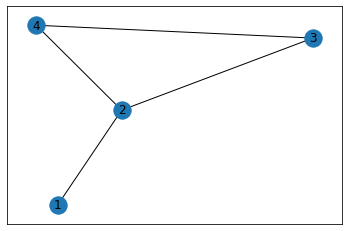

In [3]:
nx.draw_networkx(g) #The draw_networkx function is called (check online documentation to learn all the properties)

In [4]:
nx.clustering(g)

{'1': 0, '2': 0.3333333333333333, '3': 1.0, '4': 1.0}

In [5]:
nx.average_clustering(g)

0.5833333333333333

In [6]:
(0+0.333333+1+1)/4

0.58333325

### Let's test the shortest path structure

In [7]:
nx.shortest_path(g)

{'1': {'1': ['1'],
  '2': ['1', '2'],
  '3': ['1', '2', '3'],
  '4': ['1', '2', '4']},
 '2': {'2': ['2'], '1': ['2', '1'], '3': ['2', '3'], '4': ['2', '4']},
 '3': {'3': ['3'], '2': ['3', '2'], '4': ['3', '4'], '1': ['3', '2', '1']},
 '4': {'4': ['4'], '2': ['4', '2'], '3': ['4', '3'], '1': ['4', '2', '1']}}

In [8]:
nx.shortest_path(g,'2')

{'2': ['2'], '1': ['2', '1'], '3': ['2', '3'], '4': ['2', '4']}

In [9]:
list(nx.shortest_path(g,'2').values())

[['2'], ['2', '1'], ['2', '3'], ['2', '4']]

In [10]:
Pt=0 #to add path lengths
t=0 #counting paths
path_lengths=[]

for node in g.nodes():
    paths = list(nx.shortest_path(g,node).values())
    print(node, "has ",len(paths),"paths") ## Note that we need to substract 1
    for x in range(0, len(paths)):
        print(paths[x], "with length ", len(paths[x]))
        pt= len(paths[x])-1
        if pt>0:
            Pt+=pt
            t=t+1
            path_lengths.append(pt)
            #print(paths[x], "length ", len(paths[x])-1)

1 has  4 paths
['1'] with length  1
['1', '2'] with length  2
['1', '2', '3'] with length  3
['1', '2', '4'] with length  3
2 has  4 paths
['2'] with length  1
['2', '1'] with length  2
['2', '3'] with length  2
['2', '4'] with length  2
3 has  4 paths
['3'] with length  1
['3', '2'] with length  2
['3', '4'] with length  2
['3', '2', '1'] with length  3
4 has  4 paths
['4'] with length  1
['4', '2'] with length  2
['4', '3'] with length  2
['4', '2', '1'] with length  3


In [11]:
Pt

16

In [12]:
t

12

In [13]:
Pt/t

1.3333333333333333

In [14]:
nx.average_shortest_path_length(g)

1.3333333333333333

In [15]:
path_lengths

[1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2]

In [16]:
max(path_lengths)

2

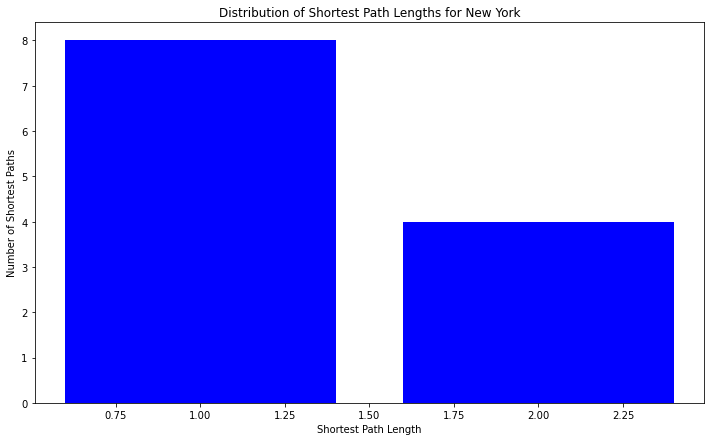

In [17]:
H, bins = np.histogram(path_lengths, bins = range(1,max(path_lengths)+2))
fig = plt.figure(figsize=(12,7))
plt.bar(bins[:-1], H, align = 'center', color = 'b')
plt.xlabel("Shortest Path Length")
plt.ylabel("Number of Shortest Paths")
plt.title("Distribution of Shortest Path Lengths for New York")
plt.show()

### Case Directed Graph

In [22]:
gd = nx.DiGraph()  #Graph base class for undirected graphs. See also:DiGraph for directed graphs
gd.add_edge('1','2',weight=1.0) #Nodes can be arbitrary (hashable) Python objects with optional key/value attributes.
gd.add_edge('2','3',weight=4.0) #Edges are represented as links between nodes with optional key/value attributes.                                
gd.add_edge('2','4',weight=1.0) #We create a network by adding 11 edges to the graph (g) of 4 nodes. 
gd.add_edge('4','3',weight=1.0)

In [23]:
edgewidth=[]
for u,v in gd.edges():
    edgewidth.append(gd.get_edge_data(u,v)['weight'])

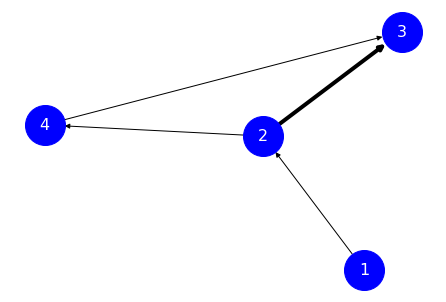

In [24]:
nx.draw(gd,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        width = edgewidth
        )

In [25]:
nx.average_shortest_path_length(gd)

0.6666666666666666